In [4]:
sir = loadESL("sir.easel")
sir_small = loadESL("sir-small-beta.easel")

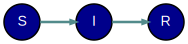

In [5]:
modelGraph(sir)

In [6]:
describeModel(sir)

|Name|State/Param|Data Type|Value|
|---|---|---|---|
|beta|parameter|Real|0.4|
|gamma|parameter|Real|4.0e-2|
|i_initial|parameter|Real|3.0|
|r_initial|parameter|Real|0.0|
|s_initial|parameter|Real|997.0|
|I|state|Real|i_initial|
|R|state|Real|r_initial|
|S|state|Real|s_initial|
|total_population|state|Real|S + I + R|

In [7]:
describeModel(sir_small)

|Name|State/Param|Data Type|Value|
|---|---|---|---|
|beta|parameter|Real|0.1|
|gamma|parameter|Real|4.0e-2|
|i_initial|parameter|Real|3.0|
|r_initial|parameter|Real|0.0|
|s_initial|parameter|Real|997.0|
|I|state|Real|i_initial|
|R|state|Real|r_initial|
|S|state|Real|s_initial|
|total_population|state|Real|S + I + R|

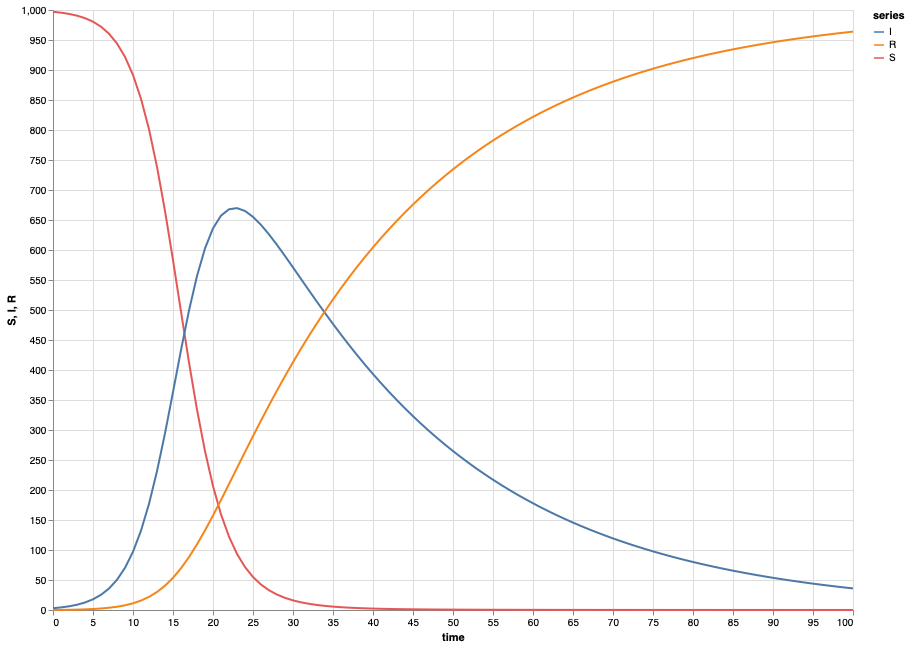

In [8]:
points = simulate(sir at [0..100 by 1])

S = series(value(points.S), "S", {{ style = "lines" }})
I = series(value(points.I), "I", {{ style = "lines" }})
R = series(value(points.R), "R", {{ style = "lines" }})

plot("", [S, I, R], time(points), "time")

In [9]:
composed = compose([["S", "S"], ["I", "I"], ["R", "R"]], sir, sir_small, "time > 10")

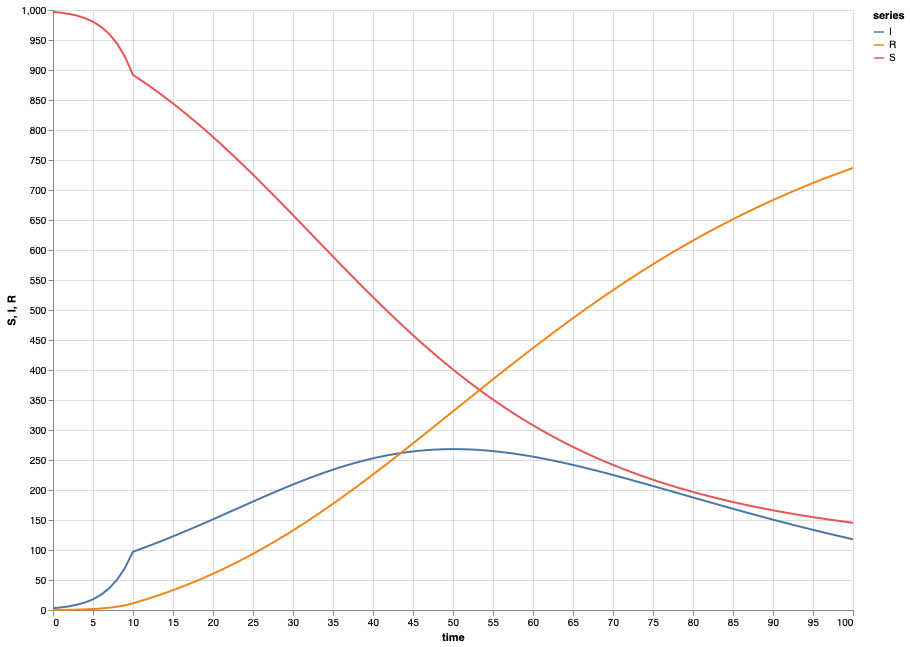

In [10]:
points = simulate(composed at [0..100 by 1])

S = series(value(points.S), "S", {{ style = "lines" }})
I = series(value(points.I), "I", {{ style = "lines" }})
R = series(value(points.R), "R", {{ style = "lines" }})

plot("", [S, I, R], time(points), "time")

In [11]:
doubleComposed = compose([["S", "S"], ["I", "I"], ["R", "R"]], composed, sir, "time > 30")

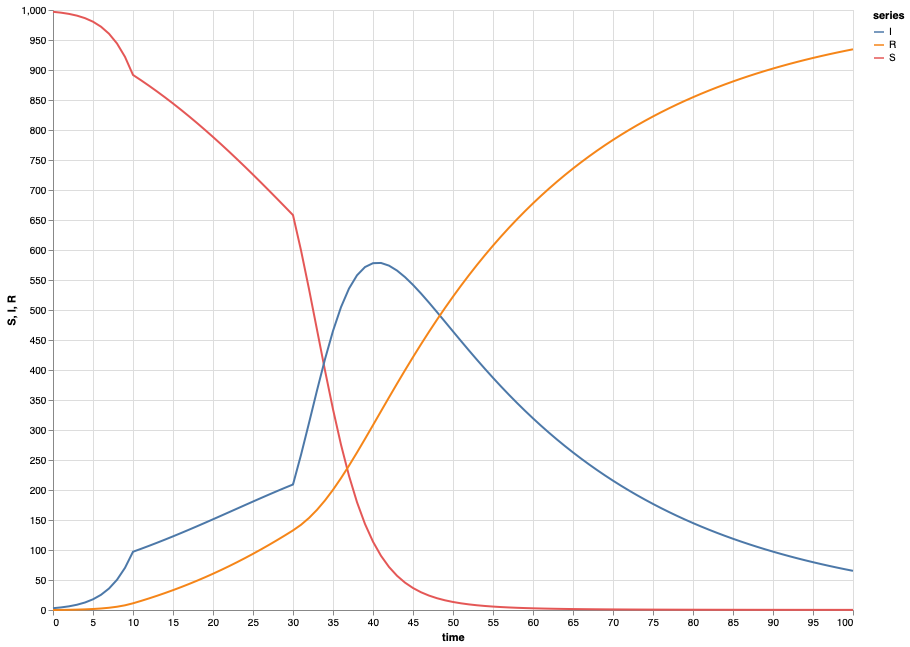

In [12]:
doublePoints = simulate(doubleComposed at [0..100 by 1])

S = series(value(doublePoints.S), "S", {{ style = "lines" }})
I = series(value(doublePoints.I), "I", {{ style = "lines" }})
R = series(value(doublePoints.R), "R", {{ style = "lines" }})

plot("", [S, I, R], time(points), "time")

In [13]:
sirsd = loadESL("sirs.easel")
tripleComposed = compose([["S", "S"], ["I", "I"], ["R", "R"]], doubleComposed, sirsd, "time > 70")

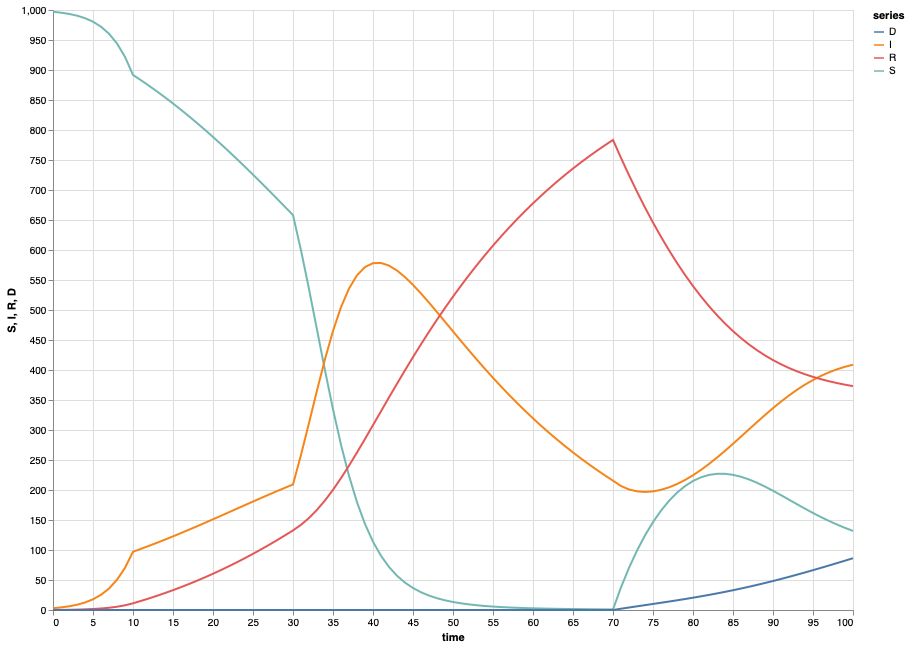

In [15]:
triplePoints = simulate(tripleComposed at [0..100 by 1])

S = series(value(triplePoints.S), "S", {{ style = "lines" }})
I = series(value(triplePoints.I), "I", {{ style = "lines" }})
R = series(value(triplePoints.R), "R", {{ style = "lines" }})
D = series(value(triplePoints.D), "D", {{ style = "lines" }})

plot("", [S, I, R, D], time(points), "time")